In [2]:
# 收集数据
# 数据 FashionMnist数据集
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
def load_data(batch_size=32,is_train=True,is_download=False):
    trans = transforms.Compose([transforms.ToTensor()])
    datasets = torchvision.datasets.FashionMNIST(root='./data',transform=trans, train=is_train,download=is_download)
    dataloader = DataLoader(datasets,batch_size=batch_size,shuffle=True)
    return dataloader


In [3]:
# 测试
for image, label in load_data(10):
    print(image.shape, label.shape)
    break

torch.Size([10, 1, 28, 28]) torch.Size([10])


In [4]:
# 创建AI
import torch
num_inputs = 28 * 28  # 输入图像的大小
num_hiddens = 256  # 隐藏层的大小
num_outputs = 10  # 输出层的大小
def MLP(X):
    global W1, B1, W2, B2, num_inputs
    X = X.reshape((-1, num_inputs))  # 将输入展平为二维张量
    H = Relu(X @ W1 + B1)  # 计算隐藏层的输出
    Y = H @ W2 + B2  # 计算输出层的输出
    return Y
def Relu(X):
    temp = torch.zeros_like(X)  # 创建一个与X形状相同的全零张量
    return torch.max(X, temp)  # 返回X和全零张量的最大值，实现ReLU激活函数

In [6]:
# 权重赋初始值
from torch import nn
W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True)*0.01)
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True)*0.01)
B1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
B2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

In [7]:
# test
data_loader = load_data(1)
for images, labels in data_loader:
    y_hat = MLP(images)
    print('y_hat: ', y_hat)
    print(f'labels:{labels}')
    break

y_hat:  tensor([[ 0.0018, -0.0083, -0.0067,  0.0016, -0.0098, -0.0018,  0.0047,  0.0002,
         -0.0074,  0.0154]], grad_fn=<AddBackward0>)
labels:tensor([5])


In [9]:
# 计算损失函数
loss = nn.CrossEntropyLoss(reduction='none')

In [ ]:
# 计算梯度


In [10]:
# 更新梯度
lr = 0.1
updater = torch.optim.SGD(params=[W1,W2,B1,B2], lr=lr)
updater.step()
updater.zero_grad()

In [11]:
# 循环迭代
def train(net, train_iter, loss, updater, num_epochs):
    l_lisst = []
    for epoch in range(num_epochs):
        for X, y in train_iter:
           y_pre = net(X)
           l = loss(y_pre, y)
           l.mean().backward()
           updater.step()
           updater.zero_grad()
           l_lisst.append(l.mean().item())
    return l_lisst

In [12]:
net = MLP
train_iter = load_data(32)
num_epochs = 10
l_list = train(net, train_iter, loss, updater, num_epochs)

0.3954111933708191


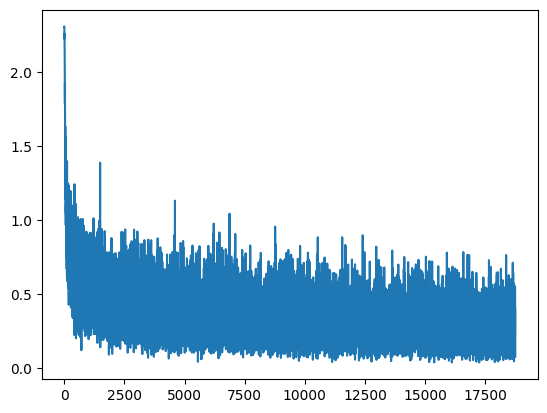

In [13]:
from matplotlib import pyplot as plt
plt.plot(l_list)
print(l_list[-1])

In [22]:
# 测试集
def test(net, testloader):
    count = 0
    sum = 0
    for x, y in testloader:
        y_pre = net(x)
        y_pre = torch.argmax(y_pre, axis=1)
        for i in range(len(y_pre)):
            count += 1
            if y_pre[i] == y[i]:
                sum += 1
    print("准确率：", sum / count)
test_iter = load_data(32, is_train=False)
test(MLP, test_iter)

准确率： 0.8727
